## Détection de signatures dans des images : 


In [ ]:
import fitz  
import os
from sklearn.model_selection import train_test_split
import shutil


pdf_folder = "Assurances/Documents Assurances"
image_output_folder = "Assurances/Converted_Images"
train_folder = os.path.join(image_output_folder, "train")
test_folder = os.path.join(image_output_folder, "test")


os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

def convert_pdf_to_images(pdf_path, output_dir):
    """
    Convertit un PDF en images par page et les sauvegarde dans le répertoire spécifié.
    """
    try:
        doc = fitz.open(pdf_path) 
        for page_num in range(len(doc)):
            page = doc[page_num]
            pix = page.get_pixmap()
            image_path = os.path.join(output_dir, f"{os.path.basename(pdf_path).replace('.pdf', '')}_page_{page_num + 1}.png")
            pix.save(image_path)  
        doc.close()
        return True
    except Exception as e:
        print(f"Erreur lors de la conversion du fichier PDF : {pdf_path}. Erreur : {e}")
        return False


all_images = []
invalid_files = []
print("Conversion des fichiers PDF en images...")
for root, _, files in os.walk(pdf_folder):
    for file in files:
        if file.endswith(".pdf"):
            pdf_path = os.path.join(root, file)
            print(f"Traitement du fichier : {pdf_path}")
            if convert_pdf_to_images(pdf_path, image_output_folder):
                print(f"PDF converti avec succès : {file}")
            else:
                print(f"Fichier invalide ou conversion échouée : {file}")
                invalid_files.append(pdf_path)

if invalid_files:
    print("\nFichiers PDF invalides ou corrompus détectés :")
    for invalid_file in invalid_files:
        print(invalid_file)
else:
    print("\nTous les fichiers PDF ont été traités avec succès.")


for root, _, files in os.walk(image_output_folder):
    for file in files:
        if file.endswith(".png"):
            all_images.append(os.path.join(root, file))


train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)


print("\nOrganisation des images en ensembles d'entraînement et de test...")
for image_path in train_images:
    shutil.move(image_path, train_folder)

for image_path in test_images:
    shutil.move(image_path, test_folder)

print(f"\nNombre total d'images générées : {len(all_images)}")
print(f"Images d'entraînement : {len(os.listdir(train_folder))}")
print(f"Images de test : {len(os.listdir(test_folder))}")


## YOLO


In [1]:
from ultralytics import YOLO
import os

signature_yaml_path = "./yolo_config/signature.yaml" 
pretrained_model = "./yolov11n.pt"  
train_images_path = "./datasets/signature/train/images"
train_labels_path = "./datasets/signature/train/labels"
valid_images_path = "./datasets/signature/valid/images"
valid_labels_path = "./datasets/signature/valid/labels"
output_model_path = "Assurances/YOLO_Trained/best4.pt"


def count_files(directory, extension=None):
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    if extension:
        files = [f for f in files if f.endswith(extension)]
    return len(files), files


print("\n==== Vérification des fichiers ====\n")


train_img_count, train_images = count_files(train_images_path, ".jpg")  
train_lbl_count, train_labels = count_files(train_labels_path, ".txt")
print(f"Train: {train_img_count} images, {train_lbl_count} labels")
if train_img_count != train_lbl_count:
    print("[ERREUR] Le nombre d'images et de labels dans TRAIN ne correspond pas!")
    exit(1)


valid_img_count, valid_images = count_files(valid_images_path, ".jpg")
valid_lbl_count, valid_labels = count_files(valid_labels_path, ".txt")
print(f"Valid: {valid_img_count} images, {valid_lbl_count} labels")
if valid_img_count != valid_lbl_count:
    print("[ERREUR] Le nombre d'images et de labels dans VALID ne correspond pas!")
    exit(1)

print("\n[INFO] Les nombres d'images et de labels sont corrects.")




==== Vérification des fichiers ====

Train: 1010 images, 1010 labels
Valid: 218 images, 218 labels

[INFO] Les nombres d'images et de labels sont corrects.


In [2]:
import os

train_path = "./datasets/signature/train/images"
valid_path = "./datasets/signature/valid/images"

print("Train images:", os.listdir(train_path))
print("Valid images:", os.listdir(valid_path))


Train images: ['10376-Mansour-Mohamed_jpg.rf.85a2438d63b50b73d1bdefb87576755f.jpg', '10565-Vader-Bonnie_jpg.rf.60e94e363ff41352a6a6116c95cd3252.jpg', '1058-Khoury-Farjallah_jpg.rf.d70b93a3e541261b2b1fc2127e5e51f6.jpg', '10776-Roach-Christopher_jpg.rf.0d70ee0dec16989ed46e504b4b359fd6.jpg', '10776-Roach-Christopher_jpg.rf.0d880c1a8b2c905b8ea665b07001ddde.jpg', '10776-Roach-Christopher_jpg.rf.5ca37281d083777e98270fee6acdf10e.jpg', '10785_SchroederAlan_jpg.rf.1b138eb0fe1c75427b7b82792a4a1642.jpg', '10785_SchroederAlan_jpg.rf.2dccb462fe01ee69c063b037305ad225.jpg', '10926-Mohan-Venkatachala_jpg.rf.14819c5f25cbee446919f142c7f90bea.jpg', '11172_Van-FlandernGeoffrey_jpg.rf.c27a9111707d7dfff2b8aa48401b9ad3.jpg', '11250-Farrell-Estelle_jpg.rf.82701e154733d5be17bf2fe70924d4f1.jpg', '11508-Stanton-Robert_jpg.rf.15ea840bf2d78382d869ab890354d16e.jpg', '11508-Stanton-Robert_jpg.rf.d5341d1e491e3c60accc25a270c80945.jpg', '11697_EsmendeSean_jpg.rf.3d5998add4c6af29bff46c4bbb1e2414.jpg', '11697_EsmendeSean

In [ ]:
from ultralytics import YOLO
import torch
import os


print("Torch Version:", torch.__version__)


signature_yaml_path = "C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml"  
pretrained_model = "yolo11n.pt"  
output_model_path = "Assurances/YOLO_Trained/best3.pt"


if not os.path.exists(signature_yaml_path):
    raise FileNotFoundError(f"Le fichier {signature_yaml_path} est introuvable.")


print("\n=== Chargement du modèle YOLO11n ===")
model = YOLO(pretrained_model)


print("\n=== Test du modèle ===")
model.info()


print("\n=== Début de l'entraînement ===")
results = model.train(
    data=signature_yaml_path,
    epochs=100,
    imgsz=640,
    batch=16,
    val=True,
    single_cls=True,
    resume=False
)

os.makedirs(os.path.dirname(output_model_path), exist_ok=True)
model.save(output_model_path)
print(f"\n[INFO] Modèle YOLO11n entraîné sauvegardé dans : {output_model_path}")


### Tester le modèle sur documents Assurances

In [ ]:
from ultralytics import YOLO
import cv2
import os

trained_model_path = "Assurances/YOLO_Trained/best_epoch_501.pt"
model = YOLO(trained_model_path)

test_image = "./Assurances/Converted_Images/POINT DU JOUR  Dispositions particulières GENERALI du 15 05 2020_page_1.png"

output_folder = "./results/"
os.makedirs(output_folder, exist_ok=True)
results = model.predict(test_image, conf=0.4)


image = cv2.imread(test_image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  


detections = results[0].boxes.xyxy  
scores = results[0].boxes.conf  
labels = results[0].boxes.cls  

print(f"Nombre de détections : {len(detections)}")

for i, box in enumerate(detections):
    x1, y1, x2, y2 = map(int, box)  
    confidence = scores[i].item()  

    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image_rgb, f"Signature: {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


    cropped_signature = image[y1:y2, x1:x2]

   
    cropped_output_path = os.path.join(output_folder, f"signature_{i + 1}.png")
    cv2.imwrite(cropped_output_path, cropped_signature)
    print(f"Recadrage enregistré : {cropped_output_path}")

output_image_path = os.path.join(output_folder, "detections_with_boxes.png")
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
print(f"Image avec détections enregistrée : {output_image_path}")


In [ ]:
import os

def check_yolo_annotations(path):
    for file in os.listdir(path):
        if file.endswith(".txt"):
            with open(os.path.join(path, file), 'r') as f:
                lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        print(f"Erreur dans {file}: {line}")

check_yolo_annotations("datasets/signature/train/labels")


In [ ]:
import os

def clean_yolo_labels(labels_dir):
    """
    Nettoie les fichiers d'annotations YOLO pour s'assurer qu'ils ne contiennent que des bounding boxes valides.
    """
    for filename in os.listdir(labels_dir):
        if filename.endswith(".txt"):
            file_path = os.path.join(labels_dir, filename)
            valid_lines = []
            
            with open(file_path, "r") as f:
                for line in f:
                    parts = line.strip().split()
        
                    if len(parts) == 5:
                        try:       
                            class_id = int(parts[0])
                            x_center, y_center, width, height = map(float, parts[1:])
                            valid_lines.append(line.strip())
                        except ValueError:
                            print(f"Erreur de format dans {filename}, ligne ignorée : {line.strip()}")
                    else:
                        print(f"Ligne invalide dans {filename}, ligne ignorée : {line.strip()}")

            with open(file_path, "w") as f:
                for line in valid_lines:
                    f.write(line + "\n")

            print(f"Fichier nettoyé : {filename} - {len(valid_lines)} lignes valides.")

labels_directory = "datasets/signature/train/labels"
clean_yolo_labels(labels_directory)


## Ajuster les labels :

In [ ]:
import os

def clean_yolo_labels(labels_dir):
    """
    Nettoie les fichiers d'annotations YOLO pour s'assurer qu'ils ne contiennent que des bounding boxes valides.
    """
    for filename in os.listdir(labels_dir):
        if filename.endswith(".txt"):
            file_path = os.path.join(labels_dir, filename)
            valid_lines = []
            
          
            with open(file_path, "r") as f:
                for line in f:
                    parts = line.strip().split()
                 
                    if len(parts) == 5:
                        try:
                     
                            class_id = int(parts[0])
                            x_center, y_center, width, height = map(float, parts[1:])
                            valid_lines.append(line.strip())
                        except ValueError:
                            print(f"Erreur de format dans {filename}, ligne ignorée : {line.strip()}")
                    else:
                        print(f"Ligne invalide dans {filename}, ligne ignorée : {line.strip()}")

            with open(file_path, "w") as f:
                for line in valid_lines:
                    f.write(line + "\n")

            print(f"Fichier nettoyé : {filename} - {len(valid_lines)} lignes valides.")


labels_directory = "datasets/signature/valid/labels"
clean_yolo_labels(labels_directory)


In [1]:
import torch

torch.cuda.empty_cache()
torch.backends.cudnn.benchmark = True


In [2]:
from ultralytics import settings
settings.log_level = 'error'


In [ ]:
from ultralytics import YOLO
import torch
import os
import shutil
import mlflow
import mlflow.pytorch
import cv2
import requests
import numpy as np
from PIL import Image
from io import BytesIO

signature_yaml_path = "C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml"
pretrained_model = "yolov8s.pt"
output_model_dir = "Assurances/YOLO_Trained/best_epoch_vf4.pt/"

os.makedirs(output_model_dir, exist_ok=True)

model = YOLO(pretrained_model)

total_epochs = 100
save_interval = 5
imgsz = 640
batch_size = 32

mlflow.set_tracking_uri("file:///" + os.path.abspath("mlruns"))
mlflow.set_experiment("YOLOv8_Signature_Detection")

def download_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return np.array(img)

def test_model_on_image(model_path, image_url, conf_threshold=0.3):
    model_test = YOLO(model_path)
    img = download_image_from_url(image_url)

    results = model_test.predict(source=img, conf=conf_threshold)

    image_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for box in results[0].boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

    cropped_signatures = []
    for i, box in enumerate(results[0].boxes.xyxy):
        x1, y1, x2, y2 = map(int, box)
        cropped_signature = img[y1:y2, x1:x2]
        cropped_signatures.append(cropped_signature)

    output_image_path = "detection_result.png"
    cv2.imwrite(output_image_path, image_bgr)

    return output_image_path, cropped_signatures


print("\n=== Début de l'entraînement ===")

for start_epoch in range(0, total_epochs, save_interval):
    end_epoch = min(start_epoch + save_interval, total_epochs)
    print(f"\n[INFO] Entraînement de l'époque {start_epoch + 1} à {end_epoch}...")

    with mlflow.start_run(nested=True):
        results = model.train(
            data=signature_yaml_path,
            epochs=save_interval,
            imgsz=imgsz,
            batch=batch_size,
            val=True,
            single_cls=True,
            workers=4,
            amp=True,
            verbose=True
        )

        last_model_path = os.path.join("runs", "detect", "train", "weights", "best.pt")
        epoch_model_path = os.path.join(output_model_dir, f"best_epoch_{end_epoch}.pt")

        if os.path.exists(last_model_path):
            shutil.copy(last_model_path, epoch_model_path)
            print(f"[INFO] Modèle sauvegardé après {end_epoch} époques dans : {epoch_model_path}")

            mlflow.log_param("epochs", end_epoch)
            mlflow.log_param("imgsz", imgsz)
            mlflow.log_param("batch_size", batch_size)

            metrics = results.results_dict
            mlflow.log_metrics({
                "precision": metrics.get('metrics/precision(B)', 0),
                "recall": metrics.get('metrics/recall(B)', 0),
                "mAP50": metrics.get('metrics/mAP50(B)', 0),
                "mAP50-95": metrics.get('metrics/mAP50-95(B)', 0)
            })

            mlflow.pytorch.log_model(model.model, artifact_path=f"yolo_signature_epoch_{end_epoch}")
            mlflow.log_artifact(epoch_model_path)

        else:
            print(f"[WARNING] Aucun modèle best.pt trouvé après {end_epoch} époques.")

    mlflow.end_run()  

print("\n=== Entraînement terminé ===")



=== Début de l'entraînement ===

[INFO] Entraînement de l'époque 1 à 5...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train54, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:03<00:00, 332.80it/s]

train: New cache created: C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache



val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<00:00, 321.03it/s]

val: New cache created: C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache


Plotting labels to runs\detect\train54\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 03:37:07 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 03:37:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 03:37:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 03:37:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 03:37:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(bdb5853480a347c6bcfc8b2426986f8f) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train54
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.737      1.549      1.557         44        640: 100%|██████████| 32/32 [11:09<00:00, 20.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<00:00, 13.96s/it]

                   all        218        224      0.841      0.829      0.873      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.619      1.193      1.493         33        640: 100%|██████████| 32/32 [07:14<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.70s/it]

                   all        218        224      0.828      0.844      0.882      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.553      1.183      1.453         35        640: 100%|██████████| 32/32 [06:39<00:00, 12.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:34<00:00,  8.68s/it]

                   all        218        224      0.849      0.839      0.892      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.543      1.136      1.436         35        640: 100%|██████████| 32/32 [06:45<00:00, 12.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:34<00:00,  8.69s/it]

                   all        218        224      0.847      0.763      0.863      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.462      1.053      1.388         21        640: 100%|██████████| 32/32 [11:40<00:00, 21.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:58<00:00, 14.56s/it]

                   all        218        224      0.917      0.889      0.935      0.548



5 epochs completed in 0.789 hours.
Optimizer stripped from runs\detect\train54\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train54\weights\best.pt, 5.4MB

Validating runs\detect\train54\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:53<00:00, 13.46s/it]


                   all        218        224      0.917      0.888      0.935      0.548
Speed: 6.8ms preprocess, 187.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\train54
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 5 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_5.pt


2025/02/23 04:26:12 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpubz3pea5\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/23 04:26:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 6 à 10...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train542, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False,

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]


Plotting labels to runs\detect\train542\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 04:26:23 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 04:26:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 04:26:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 04:26:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 04:26:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(2acd7ebf7f0d496fbbac15afd25a838f) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train542
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.414      0.983      1.358         44        640: 100%|██████████| 32/32 [8:34:15<00:00, 964.23s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:31<00:00,  7.91s/it]

                   all        218        224      0.858      0.884      0.924      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G       1.41     0.9386      1.369         33        640: 100%|██████████| 32/32 [05:59<00:00, 11.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.66s/it]

                   all        218        224      0.859      0.843      0.875      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.392     0.9698      1.351         35        640: 100%|██████████| 32/32 [06:06<00:00, 11.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.70s/it]

                   all        218        224      0.877      0.831      0.913      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.418     0.9862       1.36         35        640: 100%|██████████| 32/32 [05:24<00:00, 10.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.59s/it]

                   all        218        224      0.899      0.872      0.932      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.386     0.9693      1.346         21        640: 100%|██████████| 32/32 [05:30<00:00, 10.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.50s/it]

                   all        218        224      0.916      0.897      0.934      0.547



5 epochs completed in 9.002 hours.
Optimizer stripped from runs\detect\train542\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train542\weights\best.pt, 5.4MB

Validating runs\detect\train542\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.86s/it]


                   all        218        224      0.916      0.897      0.934      0.547
Speed: 3.3ms preprocess, 85.2ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train542
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 13:27:01 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpuhtn3qe7\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 


[INFO] Modèle sauvegardé après 10 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_10.pt


2025/02/23 13:27:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 11 à 15...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train5422, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fals

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]


Plotting labels to runs\detect\train5422\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 13:27:05 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 13:27:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 13:27:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 13:27:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 13:27:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(fd4397eddd5045fd949b38b69c4206c6) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5422
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.277     0.8519      1.288         44        640: 100%|██████████| 32/32 [05:27<00:00, 10.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.75s/it]

                   all        218        224      0.888      0.883      0.924      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.254     0.8143       1.28         33        640: 100%|██████████| 32/32 [05:20<00:00, 10.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.58s/it]

                   all        218        224       0.87      0.867      0.903       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.299     0.8694      1.298         35        640: 100%|██████████| 32/32 [05:19<00:00,  9.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.50s/it]

                   all        218        224      0.885      0.857      0.906      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.356     0.9226      1.315         35        640: 100%|██████████| 32/32 [05:20<00:00, 10.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.60s/it]

                   all        218        224      0.856      0.874      0.898      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.331     0.9134      1.311         21        640: 100%|██████████| 32/32 [05:23<00:00, 10.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.64s/it]

                   all        218        224      0.891      0.875      0.916      0.558



5 epochs completed in 0.487 hours.
Optimizer stripped from runs\detect\train5422\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train5422\weights\best.pt, 5.4MB

Validating runs\detect\train5422\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.84s/it]


                   all        218        224      0.891      0.874      0.915      0.558
Speed: 3.4ms preprocess, 85.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train5422
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 13:56:48 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpqyt72rzh\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/23 13:56:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[INFO] Modèle sauvegardé après 15 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_15.pt

[INFO] Entraînement de l'époque 16 à 20...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train54222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train54222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 13:56:52 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 13:56:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 13:56:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 13:56:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 13:56:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(14000138066047d494cadf201280bc2b) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train54222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.187     0.7873      1.231         44        640: 100%|██████████| 32/32 [05:24<00:00, 10.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.63s/it]

                   all        218        224      0.898      0.864      0.912      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.163     0.7564      1.229         33        640: 100%|██████████| 32/32 [05:22<00:00, 10.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.63s/it]

                   all        218        224      0.888       0.83      0.898       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.238     0.8162      1.252         35        640: 100%|██████████| 32/32 [05:19<00:00, 10.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.59s/it]

                   all        218        224      0.839      0.861      0.886      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.276     0.8478      1.276         35        640: 100%|██████████| 32/32 [05:26<00:00, 10.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.65s/it]

                   all        218        224      0.888      0.851      0.914      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.292     0.8613      1.289         21        640: 100%|██████████| 32/32 [05:30<00:00, 10.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.63s/it]

                   all        218        224      0.895      0.878       0.91      0.552



5 epochs completed in 0.491 hours.
Optimizer stripped from runs\detect\train54222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train54222\weights\best.pt, 5.4MB

Validating runs\detect\train54222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.62s/it]


                   all        218        224      0.895      0.877       0.91      0.552
Speed: 3.4ms preprocess, 85.0ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train54222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 14:26:45 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpim9exewm\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 


[INFO] Modèle sauvegardé après 20 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_20.pt


2025/02/23 14:26:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 21 à 25...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train542222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fa

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train542222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 14:26:48 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 14:26:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 14:26:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 14:26:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 14:26:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(8dcd76149b464e7c87db58126b14bb30) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train542222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.095     0.7185      1.185         44        640: 100%|██████████| 32/32 [05:26<00:00, 10.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.55s/it]

                   all        218        224      0.826      0.848      0.876      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.101     0.7068      1.192         33        640: 100%|██████████| 32/32 [05:23<00:00, 10.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.62s/it]

                   all        218        224      0.855      0.819      0.888      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.186     0.7669      1.221         35        640: 100%|██████████| 32/32 [05:28<00:00, 10.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.53s/it]

                   all        218        224      0.771       0.83      0.823      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.231      0.803      1.251         35        640: 100%|██████████| 32/32 [05:26<00:00, 10.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.48s/it]

                   all        218        224       0.87      0.817      0.879      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.263     0.8322       1.27         21        640: 100%|██████████| 32/32 [05:25<00:00, 10.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.45s/it]

                   all        218        224      0.894      0.893      0.922       0.55



5 epochs completed in 0.492 hours.
Optimizer stripped from runs\detect\train542222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train542222\weights\best.pt, 5.4MB

Validating runs\detect\train542222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.78s/it]


                   all        218        224      0.894      0.893      0.922      0.549
Speed: 3.5ms preprocess, 87.2ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train542222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 14:56:45 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpllcyxgxv\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/23 14:56:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[INFO] Modèle sauvegardé après 25 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_25.pt

[INFO] Entraînement de l'époque 26 à 30...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train5422222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, co

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train5422222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 14:56:48 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 14:56:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 14:56:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 14:56:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 14:56:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(b257b91209f446bca14cac474d445e29) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5422222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.021     0.6778      1.145         44        640: 100%|██████████| 32/32 [05:30<00:00, 10.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.55s/it]

                   all        218        224      0.894      0.871      0.916      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.092     0.6899       1.18         33        640: 100%|██████████| 32/32 [05:26<00:00, 10.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.54s/it]

                   all        218        224      0.837      0.862      0.874      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.146     0.7449        1.2         35        640: 100%|██████████| 32/32 [05:24<00:00, 10.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.60s/it]

                   all        218        224      0.804      0.848      0.842      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.197     0.7722      1.229         35        640: 100%|██████████| 32/32 [05:27<00:00, 10.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.56s/it]

                   all        218        224      0.843      0.839      0.874      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.226     0.7963      1.247         21        640: 100%|██████████| 32/32 [05:28<00:00, 10.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.55s/it]

                   all        218        224      0.898      0.906      0.925      0.561



5 epochs completed in 0.494 hours.
Optimizer stripped from runs\detect\train5422222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train5422222\weights\best.pt, 5.4MB

Validating runs\detect\train5422222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.67s/it]


                   all        218        224      0.898      0.906      0.925      0.561
Speed: 3.4ms preprocess, 85.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train5422222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 15:26:52 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmp7r1cqch1\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 


[INFO] Modèle sauvegardé après 30 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_30.pt


2025/02/23 15:26:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 31 à 35...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train54222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train54222222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 15:26:55 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 15:26:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 15:26:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 15:26:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 15:26:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(3f12cd3f03c74ef6b9b684887dc6941c) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train54222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      0.963     0.6416      1.116         44        640: 100%|██████████| 32/32 [05:31<00:00, 10.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.56s/it]

                   all        218        224      0.863       0.84      0.885      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G       1.11     0.6779      1.182         33        640: 100%|██████████| 32/32 [05:25<00:00, 10.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.60s/it]

                   all        218        224      0.857      0.848       0.89      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.221      0.768      1.231         35        640: 100%|██████████| 32/32 [05:23<00:00, 10.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.57s/it]

                   all        218        224      0.819      0.915      0.904      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.173     0.7583      1.218         35        640: 100%|██████████| 32/32 [05:24<00:00, 10.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.54s/it]

                   all        218        224      0.881      0.862      0.895      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.221     0.7904      1.249         21        640: 100%|██████████| 32/32 [05:27<00:00, 10.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.60s/it]

                   all        218        224      0.896      0.885      0.919      0.553



5 epochs completed in 0.492 hours.
Optimizer stripped from runs\detect\train54222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train54222222\weights\best.pt, 5.4MB

Validating runs\detect\train54222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.56s/it]


                   all        218        224      0.896      0.885      0.919      0.553
Speed: 3.5ms preprocess, 83.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train54222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 15:56:54 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpatg2uwfs\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 


[INFO] Modèle sauvegardé après 35 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_35.pt


2025/02/23 15:56:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 36 à 40...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train542222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train542222222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 15:56:57 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 15:56:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 15:56:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 15:56:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 15:56:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(e73e331600a641f4bbea2f1502692017) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train542222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      0.926     0.6083      1.096         44        640: 100%|██████████| 32/32 [05:34<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.64s/it]

                   all        218        224      0.895      0.875      0.922      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.018     0.6203      1.139         33        640: 100%|██████████| 32/32 [05:45<00:00, 10.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:28<00:00,  7.10s/it]

                   all        218        224       0.89      0.865      0.903      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.152     0.7041      1.183         35        640: 100%|██████████| 32/32 [05:27<00:00, 10.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.61s/it]

                   all        218        224      0.863       0.87        0.9      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.161     0.7435      1.205         35        640: 100%|██████████| 32/32 [05:27<00:00, 10.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.58s/it]

                   all        218        224      0.883      0.875      0.909      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.207     0.7832      1.245         21        640: 100%|██████████| 32/32 [05:27<00:00, 10.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.55s/it]

                   all        218        224      0.882      0.879      0.905      0.549



5 epochs completed in 0.501 hours.
Optimizer stripped from runs\detect\train542222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train542222222\weights\best.pt, 5.4MB

Validating runs\detect\train542222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.70s/it]


                   all        218        224      0.876      0.879      0.904       0.55
Speed: 3.4ms preprocess, 86.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train542222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 40 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_40.pt


2025/02/23 16:27:30 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmp1tu7sqnu\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/23 16:27:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 41 à 45...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train5422222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffe

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]


Plotting labels to runs\detect\train5422222222\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 16:27:33 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 16:27:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 16:27:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 16:27:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 16:27:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(cbcaea23082740298d31ebff7545e82e) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5422222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.8788     0.5878      1.075         44        640: 100%|██████████| 32/32 [05:30<00:00, 10.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.65s/it]

                   all        218        224      0.885      0.871      0.901      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.9717     0.6007      1.107         33        640: 100%|██████████| 32/32 [05:26<00:00, 10.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.46s/it]

                   all        218        224       0.91      0.866      0.903      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.069     0.6617      1.137         35        640: 100%|██████████| 32/32 [05:22<00:00, 10.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.44s/it]

                   all        218        224      0.815      0.806      0.821      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.139     0.7184      1.178         35        640: 100%|██████████| 32/32 [05:22<00:00, 10.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.33s/it]

                   all        218        224      0.867      0.877      0.912       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.174     0.7541       1.22         21        640: 100%|██████████| 32/32 [05:31<00:00, 10.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.51s/it]

                   all        218        224      0.887      0.906      0.908      0.538



5 epochs completed in 0.492 hours.
Optimizer stripped from runs\detect\train5422222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train5422222222\weights\best.pt, 5.4MB

Validating runs\detect\train5422222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.57s/it]


                   all        218        224      0.888      0.906      0.908      0.539
Speed: 3.2ms preprocess, 84.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train5422222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 16:57:32 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmp8qlgwj7_\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 


[INFO] Modèle sauvegardé après 45 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_45.pt


2025/02/23 16:57:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 46 à 50...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train54222222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buff

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train54222222222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 16:57:34 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 16:57:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 16:57:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 16:57:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 16:57:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(b5d526e84a9746d3a95cec903f7667dc) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train54222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.8495     0.5633      1.053         44        640: 100%|██████████| 32/32 [05:29<00:00, 10.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.52s/it]

                   all        218        224      0.893      0.866      0.901      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.9716     0.5855        1.1         33        640: 100%|██████████| 32/32 [05:26<00:00, 10.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.47s/it]

                   all        218        224       0.81      0.853      0.857      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.051     0.6505       1.14         35        640: 100%|██████████| 32/32 [05:22<00:00, 10.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.35s/it]

                   all        218        224      0.838       0.79      0.837      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.083     0.6802       1.15         35        640: 100%|██████████| 32/32 [05:23<00:00, 10.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.56s/it]

                   all        218        224      0.823      0.853      0.887       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.147     0.7269      1.208         21        640: 100%|██████████| 32/32 [05:24<00:00, 10.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.40s/it]

                   all        218        224      0.871      0.893      0.903      0.534



5 epochs completed in 0.490 hours.
Optimizer stripped from runs\detect\train54222222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train54222222222\weights\best.pt, 5.4MB

Validating runs\detect\train54222222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.52s/it]


                   all        218        224       0.87      0.893      0.903      0.534
Speed: 3.2ms preprocess, 83.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train54222222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 17:27:25 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpgcrim8ms\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/23 17:27:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[INFO] Modèle sauvegardé après 50 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_50.pt

[INFO] Entraînement de l'époque 51 à 55...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train542222222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=Fals

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train542222222222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 17:27:28 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 17:27:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 17:27:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 17:27:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 17:27:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(6ab64ef1f32f4766b37fa302d7f7788a) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train542222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.8071     0.5412      1.033         44        640: 100%|██████████| 32/32 [05:29<00:00, 10.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.52s/it]

                   all        218        224      0.837      0.844      0.868      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.9057     0.5679       1.06         33        640: 100%|██████████| 32/32 [05:24<00:00, 10.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.48s/it]

                   all        218        224      0.864      0.821      0.855       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.025      0.625       1.12         35        640: 100%|██████████| 32/32 [05:23<00:00, 10.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.52s/it]

                   all        218        224      0.845      0.812      0.842      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.068     0.6712      1.142         35        640: 100%|██████████| 32/32 [05:21<00:00, 10.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.54s/it]

                   all        218        224      0.878      0.868      0.905      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.139     0.7187      1.202         21        640: 100%|██████████| 32/32 [05:25<00:00, 10.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.48s/it]

                   all        218        224      0.894      0.904      0.909      0.553



5 epochs completed in 0.490 hours.
Optimizer stripped from runs\detect\train542222222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train542222222222\weights\best.pt, 5.4MB

Validating runs\detect\train542222222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.58s/it]


                   all        218        224      0.891      0.902      0.909      0.554
Speed: 3.4ms preprocess, 83.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train542222222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 17:57:19 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpmh5w_5_i\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/23 17:57:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[INFO] Modèle sauvegardé après 55 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_55.pt

[INFO] Entraînement de l'époque 56 à 60...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train5422222222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=Fal

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train5422222222222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 17:57:22 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 17:57:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 17:57:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 17:57:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 17:57:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(72965e7437234242bc682caefa27cbe0) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5422222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.7658     0.5207      1.016         44        640: 100%|██████████| 32/32 [05:29<00:00, 10.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.56s/it]

                   all        218        224      0.882      0.905      0.917      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.9009     0.5525      1.049         33        640: 100%|██████████| 32/32 [05:23<00:00, 10.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.51s/it]

                   all        218        224      0.842      0.839      0.846      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      0.961     0.6024      1.086         35        640: 100%|██████████| 32/32 [05:21<00:00, 10.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.40s/it]

                   all        218        224      0.792      0.799      0.829      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.034     0.6511      1.123         35        640: 100%|██████████| 32/32 [05:21<00:00, 10.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.50s/it]

                   all        218        224      0.874      0.868      0.877      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G       1.12     0.6995      1.191         21        640: 100%|██████████| 32/32 [05:26<00:00, 10.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.49s/it]

                   all        218        224      0.881      0.866      0.907      0.566



5 epochs completed in 0.490 hours.
Optimizer stripped from runs\detect\train5422222222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train5422222222222\weights\best.pt, 5.4MB

Validating runs\detect\train5422222222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.57s/it]


                   all        218        224      0.881      0.866      0.907      0.566
Speed: 3.2ms preprocess, 84.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train5422222222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 18:27:11 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpgmug4z0n\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/23 18:27:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[INFO] Modèle sauvegardé après 60 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_60.pt

[INFO] Entraînement de l'époque 61 à 65...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train54222222222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=Fa

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train54222222222222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 18:27:14 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 18:27:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 18:27:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 18:27:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 18:27:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(2a09b6429f3d4194a2ec0f8d1390515f) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train54222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.7466     0.5106      1.001         44        640: 100%|██████████| 32/32 [05:29<00:00, 10.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.40s/it]

                   all        218        224      0.884      0.882      0.899      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.8072     0.5086      1.012         33        640: 100%|██████████| 32/32 [05:24<00:00, 10.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.45s/it]

                   all        218        224      0.903      0.879      0.882      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.9302     0.5799      1.075         35        640: 100%|██████████| 32/32 [05:23<00:00, 10.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.38s/it]

                   all        218        224      0.848      0.849      0.866      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.037     0.6344       1.12         35        640: 100%|██████████| 32/32 [05:28<00:00, 10.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.45s/it]

                   all        218        224      0.866      0.844      0.882      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.107     0.6828      1.184         21        640: 100%|██████████| 32/32 [05:49<00:00, 10.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:28<00:00,  7.21s/it]

                   all        218        224      0.887      0.884      0.903      0.561



5 epochs completed in 0.499 hours.
Optimizer stripped from runs\detect\train54222222222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train54222222222222\weights\best.pt, 5.4MB

Validating runs\detect\train54222222222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:34<00:00,  8.59s/it]


                   all        218        224      0.887      0.884      0.903      0.562
Speed: 3.7ms preprocess, 124.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train54222222222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 18:57:53 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmp14xanbaa\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 


[INFO] Modèle sauvegardé après 65 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_65.pt


2025/02/23 18:57:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 66 à 70...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train542222222222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train542222222222222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 18:57:59 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 18:57:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 18:57:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 18:57:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 18:57:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(cd9deef6093a4445b9e403a9c5789c14) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train542222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.7033     0.4853     0.9859         44        640: 100%|██████████| 32/32 [06:07<00:00, 11.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:28<00:00,  7.10s/it]

                   all        218        224      0.917       0.84      0.907      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.7637     0.4931     0.9937         33        640: 100%|██████████| 32/32 [05:42<00:00, 10.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:35<00:00,  8.77s/it]

                   all        218        224      0.908      0.842      0.906      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.9383     0.5639      1.072         35        640: 100%|██████████| 32/32 [09:40<00:00, 18.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:49<00:00, 12.32s/it]

                   all        218        224      0.876      0.852      0.879      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.052     0.6327      1.129         35        640: 100%|██████████| 32/32 [07:04<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.42s/it]

                   all        218        224      0.867      0.875       0.89      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.144      0.687      1.204         21        640: 100%|██████████| 32/32 [05:31<00:00, 10.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.58s/it]

                   all        218        224       0.84      0.902      0.892      0.531



5 epochs completed in 0.618 hours.
Optimizer stripped from runs\detect\train542222222222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train542222222222222\weights\best.pt, 5.4MB

Validating runs\detect\train542222222222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.75s/it]


                   all        218        224      0.908      0.841      0.906      0.534
Speed: 3.2ms preprocess, 86.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train542222222222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 19:35:32 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmp2qgsznhb\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 


[INFO] Modèle sauvegardé après 70 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_70.pt


2025/02/23 19:35:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 71 à 75...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train5422222222222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train5422222222222222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 19:35:35 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 19:35:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 19:35:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 19:35:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 19:35:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(dc50a1353f874cafa5cb18a82b3f3057) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5422222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.7671     0.5039     0.9993         44        640: 100%|██████████| 32/32 [05:50<00:00, 10.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.27s/it]

                   all        218        224      0.888      0.848      0.913      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.7626     0.4854     0.9858         33        640: 100%|██████████| 32/32 [05:59<00:00, 11.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.28s/it]

                   all        218        224      0.861      0.859      0.888      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.9617     0.5811      1.077         35        640: 100%|██████████| 32/32 [06:01<00:00, 11.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.41s/it]

                   all        218        224      0.885      0.839      0.891       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.057     0.6336      1.138         35        640: 100%|██████████| 32/32 [06:18<00:00, 11.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.37s/it]

                   all        218        224      0.922       0.84       0.89      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.141     0.6906      1.202         21        640: 100%|██████████| 32/32 [06:32<00:00, 12.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:34<00:00,  8.71s/it]

                   all        218        224      0.877      0.894      0.907      0.532



5 epochs completed in 0.557 hours.
Optimizer stripped from runs\detect\train5422222222222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train5422222222222222\weights\best.pt, 5.4MB

Validating runs\detect\train5422222222222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.53s/it]


                   all        218        224      0.877      0.894      0.907      0.533
Speed: 3.9ms preprocess, 109.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\detect\train5422222222222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 75 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_75.pt


2025/02/23 20:09:38 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpkhf516v1\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/23 20:09:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 76 à 80...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train54222222222222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, strea

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]


Plotting labels to runs\detect\train54222222222222222\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 20:09:43 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 20:09:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 20:09:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 20:09:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 20:09:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(7b5ff65e27f44ca297234ce1bb3546ae) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train54222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.6877     0.4737     0.9761         44        640: 100%|██████████| 32/32 [10:14<00:00, 19.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<00:00,  7.49s/it]

                   all        218        224      0.892      0.871      0.911      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.7237     0.4728     0.9687         33        640: 100%|██████████| 32/32 [06:49<00:00, 12.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:28<00:00,  7.22s/it]

                   all        218        224      0.848      0.862      0.871      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.8923     0.5539      1.046         35        640: 100%|██████████| 32/32 [05:27<00:00, 10.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.31s/it]

                   all        218        224      0.824      0.879      0.843      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.026     0.6186      1.123         35        640: 100%|██████████| 32/32 [05:15<00:00,  9.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.35s/it]

                   all        218        224      0.859      0.804      0.875      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.096     0.6702      1.168         21        640: 100%|██████████| 32/32 [05:14<00:00,  9.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.28s/it]

                   all        218        224      0.861      0.888      0.895      0.516



5 epochs completed in 0.592 hours.
Optimizer stripped from runs\detect\train54222222222222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train54222222222222222\weights\best.pt, 5.4MB

Validating runs\detect\train54222222222222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.57s/it]


                   all        218        224      0.891      0.871      0.911      0.518
Speed: 3.2ms preprocess, 84.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train54222222222222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 80 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_80.pt


2025/02/23 20:45:42 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmp4lfpx6tp\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/23 20:45:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 81 à 85...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train542222222222222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stre

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train542222222222222222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 20:45:45 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 20:45:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 20:45:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 20:45:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 20:45:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(1bac3446a5204a72be0867ffb5663591) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train542222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.6373     0.4374     0.9467         44        640: 100%|██████████| 32/32 [05:18<00:00,  9.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.39s/it]

                   all        218        224        0.9      0.881      0.925      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.7359     0.4757     0.9712         33        640: 100%|██████████| 32/32 [05:19<00:00,  9.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.35s/it]

                   all        218        224      0.859      0.871      0.889      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      0.878     0.5511      1.038         35        640: 100%|██████████| 32/32 [05:18<00:00,  9.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.36s/it]

                   all        218        224      0.829      0.862      0.857      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.014     0.6153      1.115         35        640: 100%|██████████| 32/32 [05:13<00:00,  9.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.34s/it]

                   all        218        224      0.902      0.835      0.891      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.101     0.6753      1.184         21        640: 100%|██████████| 32/32 [05:14<00:00,  9.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.23s/it]

                   all        218        224       0.89      0.902      0.901      0.516



5 epochs completed in 0.478 hours.
Optimizer stripped from runs\detect\train542222222222222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train542222222222222222\weights\best.pt, 5.4MB

Validating runs\detect\train542222222222222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.52s/it]


                   all        218        224      0.898      0.879      0.925       0.55
Speed: 3.2ms preprocess, 83.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train542222222222222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 21:14:51 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpe8vwkr60\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 


[INFO] Modèle sauvegardé après 85 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_85.pt


2025/02/23 21:14:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 86 à 90...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train5422222222222222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, str

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train5422222222222222222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 21:14:53 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 21:14:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 21:14:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 21:14:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 21:14:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(2e4c6e70b03a47b28e66aaf65640a795) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5422222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.5695     0.4039      0.923         44        640: 100%|██████████| 32/32 [05:17<00:00,  9.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.32s/it]

                   all        218        224      0.883      0.911      0.925      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.7654     0.4759     0.9815         33        640: 100%|██████████| 32/32 [05:15<00:00,  9.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.28s/it]

                   all        218        224      0.869      0.887      0.901      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.9175     0.5571      1.059         35        640: 100%|██████████| 32/32 [05:15<00:00,  9.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.32s/it]

                   all        218        224      0.836      0.868      0.859      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G       1.03     0.6175      1.121         35        640: 100%|██████████| 32/32 [05:14<00:00,  9.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:25<00:00,  6.36s/it]

                   all        218        224      0.795      0.848      0.867      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.112     0.6867      1.179         21        640: 100%|██████████| 32/32 [06:05<00:00, 11.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.57s/it]

                   all        218        224      0.868      0.907      0.899      0.523



5 epochs completed in 0.492 hours.
Optimizer stripped from runs\detect\train5422222222222222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train5422222222222222222\weights\best.pt, 5.4MB

Validating runs\detect\train5422222222222222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.58s/it]


                   all        218        224      0.884      0.911      0.925      0.546
Speed: 3.8ms preprocess, 92.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train5422222222222222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 90 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_90.pt


2025/02/23 21:44:58 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpdf39in1z\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/23 21:44:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 91 à 95...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train54222222222222222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, st

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train54222222222222222222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 21:45:03 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 21:45:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 21:45:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 21:45:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 21:45:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(503a37edd7874fa09167a1fae490ce22) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train54222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.5584     0.3939      0.914         44        640: 100%|██████████| 32/32 [06:25<00:00, 12.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<00:00,  7.53s/it]

                   all        218        224      0.892      0.897      0.921      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.7855     0.4839      0.985         33        640: 100%|██████████| 32/32 [09:14<00:00, 17.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:44<00:00, 11.16s/it]

                   all        218        224      0.898      0.884      0.908      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.9186     0.5571      1.055         35        640: 100%|██████████| 32/32 [10:50<00:00, 20.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:51<00:00, 12.79s/it]

                   all        218        224      0.844      0.857      0.875      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G       1.01     0.6061      1.118         35        640: 100%|██████████| 32/32 [10:37<00:00, 19.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:49<00:00, 12.26s/it]

                   all        218        224      0.872      0.848      0.887      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.115     0.6765      1.179         21        640: 100%|██████████| 32/32 [10:28<00:00, 19.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:45<00:00, 11.50s/it]

                   all        218        224      0.887      0.884      0.905      0.509



5 epochs completed in 0.862 hours.
Optimizer stripped from runs\detect\train54222222222222222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train54222222222222222222\weights\best.pt, 5.4MB

Validating runs\detect\train54222222222222222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:36<00:00,  9.04s/it]


                   all        218        224       0.89      0.897      0.921      0.554
Speed: 4.1ms preprocess, 132.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\train54222222222222222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 95 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_95.pt


2025/02/23 22:37:32 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpi93rws67\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/23 22:37:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 96 à 100...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/best_epoch_101.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train542222222222222222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, 

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 1010 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1010/1010 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 218 images, 7 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to runs\detect\train542222222222222222222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/02/23 22:37:37 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/23 22:37:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/23 22:37:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/23 22:37:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/23 22:37:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(183798ac237145b5bd6466594ee029d2) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train542222222222222222222
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.5749      0.395     0.9107         44        640: 100%|██████████| 32/32 [09:05<00:00, 17.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.40s/it]

                   all        218        224      0.905      0.888      0.918      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.7677      0.486     0.9817         33        640: 100%|██████████| 32/32 [10:28<00:00, 19.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:44<00:00, 11.01s/it]

                   all        218        224      0.875      0.888      0.897      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G        0.9     0.5628      1.049         35        640: 100%|██████████| 32/32 [06:07<00:00, 11.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.67s/it]

                   all        218        224      0.841      0.848      0.876      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.019     0.6218      1.117         35        640: 100%|██████████| 32/32 [05:31<00:00, 10.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.60s/it]

                   all        218        224      0.938      0.786      0.884      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.119     0.6828      1.192         21        640: 100%|██████████| 32/32 [05:26<00:00, 10.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:26<00:00,  6.55s/it]

                   all        218        224      0.866      0.868      0.878       0.51



5 epochs completed in 0.662 hours.
Optimizer stripped from runs\detect\train542222222222222222222\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train542222222222222222222\weights\best.pt, 5.4MB

Validating runs\detect\train542222222222222222222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.72s/it]


                   all        218        224      0.905      0.893      0.918      0.539
Speed: 3.3ms preprocess, 85.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train542222222222222222222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'


2025/02/23 23:17:49 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmp28ewfdnj\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/23 23:17:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[INFO] Modèle sauvegardé après 100 époques dans : Assurances/YOLO_Trained/best_epoch_vf3.pt/best_epoch_100.pt

=== Entraînement terminé ===


In [ ]:
from ultralytics import YOLO
import torch
import os
import shutil
import mlflow
import mlflow.pytorch
import cv2
import requests
import numpy as np
from PIL import Image
from io import BytesIO

signature_yaml_path = "C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml"
pretrained_model = "yolov8s.pt"
output_model_dir = "Assurances/YOLO_Trained/best_epoch_vf4.pt/"

os.makedirs(output_model_dir, exist_ok=True)

model = YOLO(pretrained_model)

total_epochs = 100
save_interval = 10
imgsz = 640
batch_size = 32

mlflow.set_tracking_uri("file:///" + os.path.abspath("mlruns"))
mlflow.set_experiment("YOLOv8_Signature_Detection")

def download_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return np.array(img)

def test_model_on_image(model_path, image_url, conf_threshold=0.3):
    model_test = YOLO(model_path)
    img = download_image_from_url(image_url)

    results = model_test.predict(source=img, conf=conf_threshold)

    image_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for box in results[0].boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

    cropped_signatures = []
    for i, box in enumerate(results[0].boxes.xyxy):
        x1, y1, x2, y2 = map(int, box)
        cropped_signature = img[y1:y2, x1:x2]
        cropped_signatures.append(cropped_signature)

    output_image_path = "detection_result.png"
    cv2.imwrite(output_image_path, image_bgr)

    return output_image_path, cropped_signatures


print("\n=== Début de l'entraînement ===")

for start_epoch in range(0, total_epochs, save_interval):
    end_epoch = min(start_epoch + save_interval, total_epochs)
    print(f"\n[INFO] Entraînement de l'époque {start_epoch + 1} à {end_epoch}...")

    with mlflow.start_run(nested=True):
        results = model.train(
            data=signature_yaml_path,
            epochs=save_interval,
            imgsz=imgsz,
            batch=batch_size,
            val=True,
            single_cls=True,
            workers=4,
            amp=True,
            verbose=True
        )

        last_model_path = os.path.join("runs", "detect", "train", "weights", "best.pt")
        epoch_model_path = os.path.join(output_model_dir, f"best_epoch_{end_epoch}.pt")

        if os.path.exists(last_model_path):
            shutil.copy(last_model_path, epoch_model_path)
            print(f"[INFO] Modèle sauvegardé après {end_epoch} époques dans : {epoch_model_path}")

            mlflow.log_param("epochs", end_epoch)
            mlflow.log_param("imgsz", imgsz)
            mlflow.log_param("batch_size", batch_size)

            metrics = results.results_dict
            mlflow.log_metrics({
                "precision": metrics.get('metrics/precision(B)', 0),
                "recall": metrics.get('metrics/recall(B)', 0),
                "mAP50": metrics.get('metrics/mAP50(B)', 0),
                "mAP50-95": metrics.get('metrics/mAP50-95(B)', 0)
            })

            mlflow.pytorch.log_model(model.model, artifact_path=f"yolo_signature_epoch_{end_epoch}")
            mlflow.log_artifact(epoch_model_path)

        else:
            print(f"[WARNING] Aucun modèle best.pt trouvé après {end_epoch} époques.")

    mlflow.end_run()  

print("\n=== Entraînement terminé ===")



=== Début de l'entraînement ===

[INFO] Entraînement de l'époque 1 à 10...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train55, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fals

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels... 616 images, 4 backgrounds, 0 corrupt: 100%|██████████| 616/616 [00:01<00:00, 403.45it/s]


train: New cache created: C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache


val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels... 148 images, 7 backgrounds, 0 corrupt: 100%|██████████| 148/148 [00:00<00:00, 318.36it/s]

val: New cache created: C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache


Plotting labels to runs\detect\train55\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/02/24 00:30:25 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/24 00:30:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/24 00:30:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/24 00:30:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/24 00:30:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(bd30cf7eed8f4a5d93265aa715c4e4cd) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train55
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.501      4.523      1.345          8        640: 100%|██████████| 20/20 [11:30<00:00, 34.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.99s/it]

                   all        148        154       0.62      0.584      0.598      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.466       1.81      1.325         13        640: 100%|██████████| 20/20 [08:36<00:00, 25.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.96s/it]

                   all        148        154      0.262      0.468      0.328      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.511      1.504      1.367          8        640: 100%|██████████| 20/20 [08:37<00:00, 25.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.90s/it]

                   all        148        154     0.0307      0.338      0.174     0.0932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.433      1.292      1.326          7        640: 100%|██████████| 20/20 [08:31<00:00, 25.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.89s/it]

                   all        148        154     0.0333       0.37     0.0213    0.00632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.468      1.241      1.345          8        640: 100%|██████████| 20/20 [08:18<00:00, 24.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.76s/it]

                   all        148        154     0.0383      0.519     0.0296     0.0127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.402      1.134      1.338          9        640: 100%|██████████| 20/20 [08:37<00:00, 25.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.69s/it]

                   all        148        154      0.114      0.662      0.104     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.402      1.097       1.31          8        640: 100%|██████████| 20/20 [08:17<00:00, 24.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.86s/it]

                   all        148        154      0.683      0.773      0.813      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G       1.27      0.953      1.228          8        640: 100%|██████████| 20/20 [08:14<00:00, 24.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.97s/it]

                   all        148        154      0.784      0.799      0.844       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.202     0.8768      1.202         11        640: 100%|██████████| 20/20 [08:22<00:00, 25.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.87s/it]

                   all        148        154      0.863      0.779      0.852      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G       1.16     0.8375      1.187         10        640: 100%|██████████| 20/20 [08:54<00:00, 26.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.90s/it]

                   all        148        154      0.829      0.883      0.903      0.598



10 epochs completed in 1.585 hours.
Optimizer stripped from runs\detect\train55\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train55\weights\best.pt, 22.5MB

Validating runs\detect\train55\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:34<00:00, 11.34s/it]


                   all        148        154      0.829      0.883      0.903      0.598
Speed: 4.1ms preprocess, 206.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train55
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 10 époques dans : Assurances/YOLO_Trained/best_epoch_vf4.pt/best_epoch_10.pt


2025/02/24 02:06:10 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmp85g6tasc\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/24 02:06:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 11 à 20...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train552, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fal

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 616 images, 4 backgrounds, 0 corrupt: 100%|██████████| 616/616 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 148 images, 7 backgrounds, 0 corrupt: 100%|██████████| 148/148 [00:00<?, ?it/s]

Plotting labels to runs\detect\train552\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/02/24 02:06:13 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/24 02:06:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/24 02:06:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/24 02:06:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/24 02:06:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(6ad7ac15bb0448939c5dc9d6aed69e33) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train552
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.116     0.7799      1.151          8        640: 100%|██████████| 20/20 [08:21<00:00, 25.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:37<00:00, 12.53s/it]

                   all        148        154      0.834      0.816      0.861      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.237     0.8997      1.213         13        640: 100%|██████████| 20/20 [08:21<00:00, 25.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.83s/it]

                   all        148        154      0.828      0.813      0.875      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.221     0.8936      1.201          8        640: 100%|██████████| 20/20 [08:13<00:00, 24.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.94s/it]

                   all        148        154      0.625      0.753       0.68      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.222     0.8965      1.206          7        640: 100%|██████████| 20/20 [08:03<00:00, 24.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:39<00:00, 13.08s/it]

                   all        148        154      0.679      0.632      0.646      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.202     0.8788      1.192          8        640: 100%|██████████| 20/20 [08:22<00:00, 25.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.92s/it]

                   all        148        154      0.634      0.623      0.545      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.208     0.8653      1.209          9        640: 100%|██████████| 20/20 [08:40<00:00, 26.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:39<00:00, 13.14s/it]

                   all        148        154      0.802      0.688      0.771      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.183     0.8361      1.186          8        640: 100%|██████████| 20/20 [08:32<00:00, 25.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:39<00:00, 13.04s/it]

                   all        148        154       0.78      0.792       0.84      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.126     0.7691      1.156          8        640: 100%|██████████| 20/20 [08:35<00:00, 25.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.96s/it]

                   all        148        154      0.824      0.818      0.845      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G        1.1     0.7247      1.135         11        640: 100%|██████████| 20/20 [08:32<00:00, 25.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.99s/it]

                   all        148        154      0.817       0.89        0.9      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.025     0.6944        1.1         10        640: 100%|██████████| 20/20 [08:08<00:00, 24.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.88s/it]

                   all        148        154      0.839      0.847      0.904      0.599



10 epochs completed in 1.517 hours.
Optimizer stripped from runs\detect\train552\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train552\weights\best.pt, 22.5MB

Validating runs\detect\train552\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:34<00:00, 11.34s/it]


                   all        148        154      0.839      0.846      0.904      0.599
Speed: 3.9ms preprocess, 207.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train552
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 20 époques dans : Assurances/YOLO_Trained/best_epoch_vf4.pt/best_epoch_20.pt


2025/02/24 03:37:54 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmp2ttw6ryt\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/24 03:37:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 21 à 30...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train5522, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fa

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 616 images, 4 backgrounds, 0 corrupt: 100%|██████████| 616/616 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 148 images, 7 backgrounds, 0 corrupt: 100%|██████████| 148/148 [00:00<?, ?it/s]

Plotting labels to runs\detect\train5522\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/02/24 03:37:57 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/24 03:37:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/24 03:37:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/24 03:37:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/24 03:37:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(6bbe7be66f104ac196c10038b84fddd5) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5522
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.9653     0.6164      1.064          8        640: 100%|██████████| 20/20 [08:17<00:00, 24.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:37<00:00, 12.63s/it]

                   all        148        154      0.801      0.805      0.871      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.052     0.7124      1.104         13        640: 100%|██████████| 20/20 [08:30<00:00, 25.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.83s/it]

                   all        148        154       0.82      0.786      0.839      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G       1.09     0.7369      1.124          8        640: 100%|██████████| 20/20 [08:28<00:00, 25.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:39<00:00, 13.06s/it]

                   all        148        154      0.714      0.584       0.63      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.085     0.7739      1.143          7        640: 100%|██████████| 20/20 [08:39<00:00, 25.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.87s/it]

                   all        148        154      0.788      0.651      0.757      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.093     0.7945      1.142          8        640: 100%|██████████| 20/20 [08:55<00:00, 26.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:39<00:00, 13.33s/it]

                   all        148        154      0.851       0.85      0.894      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.064     0.7326      1.129          9        640: 100%|██████████| 20/20 [08:23<00:00, 25.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.98s/it]

                   all        148        154      0.773      0.818      0.829      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.123     0.7389       1.15          8        640: 100%|██████████| 20/20 [08:18<00:00, 24.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.96s/it]

                   all        148        154      0.817      0.825      0.859      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G       1.04     0.6891      1.118          8        640: 100%|██████████| 20/20 [08:27<00:00, 25.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:37<00:00, 12.66s/it]

                   all        148        154       0.82      0.812      0.859       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.037     0.6573      1.113         11        640: 100%|██████████| 20/20 [08:48<00:00, 26.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:37<00:00, 12.66s/it]

                   all        148        154      0.852      0.787      0.873      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.9552     0.6081      1.064         10        640: 100%|██████████| 20/20 [08:34<00:00, 25.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.67s/it]

                   all        148        154      0.885      0.901      0.921      0.632



10 epochs completed in 1.542 hours.
Optimizer stripped from runs\detect\train5522\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train5522\weights\best.pt, 22.5MB

Validating runs\detect\train5522\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:33<00:00, 11.09s/it]


                   all        148        154      0.885      0.901      0.921      0.632
Speed: 3.5ms preprocess, 203.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train5522
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 30 époques dans : Assurances/YOLO_Trained/best_epoch_vf4.pt/best_epoch_30.pt


2025/02/24 05:11:05 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpmp4mpcx1\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/24 05:11:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 31 à 40...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train55222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=F

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 616 images, 4 backgrounds, 0 corrupt: 100%|██████████| 616/616 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 148 images, 7 backgrounds, 0 corrupt: 100%|██████████| 148/148 [00:00<?, ?it/s]

Plotting labels to runs\detect\train55222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/02/24 05:11:08 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/24 05:11:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/24 05:11:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/24 05:11:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/24 05:11:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(90c66706c98049c0b5a8a87d564c7275) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train55222
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.8631     0.5472      1.014          8        640: 100%|██████████| 20/20 [08:37<00:00, 25.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:37<00:00, 12.67s/it]

                   all        148        154      0.891      0.853      0.915      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9288     0.6115       1.04         13        640: 100%|██████████| 20/20 [08:21<00:00, 25.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.83s/it]

                   all        148        154      0.838      0.318      0.367      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.006     0.6509      1.061          8        640: 100%|██████████| 20/20 [08:26<00:00, 25.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.71s/it]

                   all        148        154      0.842      0.795      0.858      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.006     0.6856      1.098          7        640: 100%|██████████| 20/20 [08:21<00:00, 25.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:37<00:00, 12.64s/it]

                   all        148        154      0.799      0.857      0.848      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.017     0.6881      1.086          8        640: 100%|██████████| 20/20 [08:19<00:00, 24.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.75s/it]

                   all        148        154      0.711      0.851      0.781      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.001     0.6494      1.107          9        640: 100%|██████████| 20/20 [08:36<00:00, 25.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.77s/it]

                   all        148        154       0.85      0.825      0.872      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.9904     0.6466      1.086          8        640: 100%|██████████| 20/20 [08:25<00:00, 25.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.78s/it]

                   all        148        154      0.782      0.906      0.884      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.9705      0.622      1.081          8        640: 100%|██████████| 20/20 [08:33<00:00, 25.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.85s/it]

                   all        148        154      0.865       0.89      0.902       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.9779     0.6321      1.085         11        640: 100%|██████████| 20/20 [08:30<00:00, 25.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.76s/it]

                   all        148        154      0.845       0.89      0.894      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.9122     0.5737      1.045         10        640: 100%|██████████| 20/20 [08:22<00:00, 25.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:37<00:00, 12.55s/it]

                   all        148        154      0.853      0.869      0.905      0.599



10 epochs completed in 1.527 hours.
Optimizer stripped from runs\detect\train55222\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train55222\weights\best.pt, 22.5MB

Validating runs\detect\train55222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:34<00:00, 11.36s/it]


                   all        148        154      0.891      0.852      0.915      0.609
Speed: 3.7ms preprocess, 207.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train55222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 40 époques dans : Assurances/YOLO_Trained/best_epoch_vf4.pt/best_epoch_40.pt


2025/02/24 06:43:23 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpf81nguw5\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/24 06:43:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 41 à 50...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train552222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 616 images, 4 backgrounds, 0 corrupt: 100%|██████████| 616/616 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 148 images, 7 backgrounds, 0 corrupt: 100%|██████████| 148/148 [00:00<?, ?it/s]

Plotting labels to runs\detect\train552222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/02/24 06:43:27 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/24 06:43:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/24 06:43:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/24 06:43:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/24 06:43:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(204b376c418a4313a68f0fd1b9a5a577) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train552222
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.7336     0.4791     0.9596          8        640: 100%|██████████| 20/20 [08:26<00:00, 25.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.68s/it]

                   all        148        154      0.849      0.864      0.887      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9525     0.5881      1.044         13        640: 100%|██████████| 20/20 [08:44<00:00, 26.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.90s/it]

                   all        148        154      0.911      0.864      0.914      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.9726     0.6446       1.05          8        640: 100%|██████████| 20/20 [08:22<00:00, 25.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.69s/it]

                   all        148        154      0.733      0.747      0.749      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.9653     0.6697      1.069          7        640: 100%|██████████| 20/20 [08:14<00:00, 24.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.97s/it]

                   all        148        154      0.705      0.806      0.793      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.9816     0.7322      1.067          8        640: 100%|██████████| 20/20 [08:23<00:00, 25.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.75s/it]

                   all        148        154      0.706      0.805      0.809      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.012     0.6776       1.09          9        640: 100%|██████████| 20/20 [08:16<00:00, 24.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.96s/it]

                   all        148        154      0.781      0.877      0.883      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.015     0.6654      1.094          8        640: 100%|██████████| 20/20 [08:08<00:00, 24.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:37<00:00, 12.64s/it]

                   all        148        154      0.808      0.874      0.873      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.9468     0.6269      1.076          8        640: 100%|██████████| 20/20 [08:18<00:00, 24.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.70s/it]

                   all        148        154      0.892      0.825      0.904      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.9415        0.6      1.078         11        640: 100%|██████████| 20/20 [08:30<00:00, 25.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.75s/it]

                   all        148        154      0.858      0.857      0.898      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.9223     0.5528      1.052         10        640: 100%|██████████| 20/20 [08:37<00:00, 25.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.81s/it]

                   all        148        154      0.904      0.859      0.923      0.605



10 epochs completed in 1.519 hours.
Optimizer stripped from runs\detect\train552222\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train552222\weights\best.pt, 22.5MB

Validating runs\detect\train552222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:33<00:00, 11.22s/it]


                   all        148        154      0.904      0.859      0.923      0.606
Speed: 3.7ms preprocess, 205.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train552222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 50 époques dans : Assurances/YOLO_Trained/best_epoch_vf4.pt/best_epoch_50.pt


2025/02/24 08:15:14 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmp3sa0rvfx\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/24 08:15:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 51 à 60...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train5522222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 616 images, 4 backgrounds, 0 corrupt: 100%|██████████| 616/616 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 148 images, 7 backgrounds, 0 corrupt: 100%|██████████| 148/148 [00:00<?, ?it/s]

Plotting labels to runs\detect\train5522222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/02/24 08:15:17 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/24 08:15:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/24 08:15:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/24 08:15:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/24 08:15:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(7149eafc35564179b8264f3ba2b34ab5) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5522222
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.7812     0.4963     0.9775          8        640: 100%|██████████| 20/20 [08:10<00:00, 24.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.96s/it]

                   all        148        154      0.902        0.9      0.919      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.8527     0.5389     0.9986         13        640: 100%|██████████| 20/20 [08:22<00:00, 25.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.82s/it]

                   all        148        154      0.855       0.87        0.9      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.8854     0.5676      1.007          8        640: 100%|██████████| 20/20 [08:07<00:00, 24.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.85s/it]

                   all        148        154       0.79      0.825      0.856      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      0.912     0.5956      1.047          7        640: 100%|██████████| 20/20 [09:35<00:00, 28.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.90s/it]

                   all        148        154      0.839       0.88      0.877      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.9112     0.6025      1.043          8        640: 100%|██████████| 20/20 [08:51<00:00, 26.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.89s/it]

                   all        148        154      0.812      0.708      0.808      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.9285     0.6176      1.074          9        640: 100%|██████████| 20/20 [08:34<00:00, 25.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.68s/it]

                   all        148        154      0.839      0.812      0.882      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.9388     0.6255      1.068          8        640: 100%|██████████| 20/20 [1:15:34<00:00, 226.75s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.84s/it]

                   all        148        154      0.884      0.792      0.852      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.9052     0.5807      1.051          8        640: 100%|██████████| 20/20 [10:37<00:00, 31.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:10<00:00, 23.36s/it]

                   all        148        154       0.82      0.711      0.783      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.8981     0.5668      1.048         11        640: 100%|██████████| 20/20 [13:44<00:00, 41.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:13<00:00, 24.54s/it]

                   all        148        154      0.839      0.846      0.891      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.8587     0.5164      1.028         10        640: 100%|██████████| 20/20 [14:29<00:00, 43.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:13<00:00, 24.67s/it]

                   all        148        154      0.912       0.89      0.936      0.619



10 epochs completed in 2.918 hours.
Optimizer stripped from runs\detect\train5522222\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train5522222\weights\best.pt, 22.5MB

Validating runs\detect\train5522222\weights\best.pt...
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:07<00:00, 22.50s/it]


                   all        148        154      0.902        0.9      0.919      0.626
Speed: 2.9ms preprocess, 392.8ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs\detect\train5522222
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 60 époques dans : Assurances/YOLO_Trained/best_epoch_vf4.pt/best_epoch_60.pt


2025/02/24 11:11:44 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ilyes\AppData\Local\Temp\tmpw116e4tx\model\data, flavor: pytorch). Fall back to return ['torch==2.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/24 11:11:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 61 à 70...
New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train55222222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augmen

train: Scanning C:\Users\ilyes\intelligIA\datasets\signature\train\labels.cache... 616 images, 4 backgrounds, 0 corrupt: 100%|██████████| 616/616 [00:00<?, ?it/s]
val: Scanning C:\Users\ilyes\intelligIA\datasets\signature\valid\labels.cache... 148 images, 7 backgrounds, 0 corrupt: 100%|██████████| 148/148 [00:00<?, ?it/s]


Plotting labels to runs\detect\train55222222\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/02/24 11:11:53 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/24 11:11:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/24 11:11:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/24 11:11:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/24 11:11:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(99b4571ee6034376bbbb14919985419e) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train55222222
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G       0.66     0.4295     0.9283          8        640: 100%|██████████| 20/20 [11:54<00:00, 35.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:43<00:00, 14.57s/it]

                   all        148        154      0.862      0.903      0.916      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.8696     0.5187     0.9986         13        640: 100%|██████████| 20/20 [10:38<00:00, 31.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:47<00:00, 15.67s/it]

                   all        148        154       0.82      0.818      0.832      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.8923     0.5816      1.018         33        640:  70%|███████   | 14/20 [09:41<04:09, 41.50s/it]


## Stamps Detection Hugging Face

In [2]:
from ultralytics import YOLO
import torch
import os
import shutil
import mlflow
import mlflow.pytorch
import cv2
import requests
import numpy as np
from PIL import Image
from io import BytesIO

signature_yaml_path = "C:/Users/ilyes/intelligIA/datasets/stamp-detect/data.yaml"
pretrained_model = "yolov8s.pt"
output_model_dir = "Assurances/YOLO_Trained/best_epoch_vf5.pt/"

os.makedirs(output_model_dir, exist_ok=True)

model = YOLO(pretrained_model)

total_epochs = 100
save_interval = 10
imgsz = 640
batch_size = 32

mlflow.set_tracking_uri("file:///" + os.path.abspath("mlruns"))
mlflow.set_experiment("YOLOv8_Stamps_Detection")

def download_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return np.array(img)

def test_model_on_image(model_path, image_url, conf_threshold=0.3):
    model_test = YOLO(model_path)
    img = download_image_from_url(image_url)

    results = model_test.predict(source=img, conf=conf_threshold)

    image_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for box in results[0].boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

    cropped_signatures = []
    for i, box in enumerate(results[0].boxes.xyxy):
        x1, y1, x2, y2 = map(int, box)
        cropped_signature = img[y1:y2, x1:x2]
        cropped_signatures.append(cropped_signature)

    output_image_path = "detection_result.png"
    cv2.imwrite(output_image_path, image_bgr)

    return output_image_path, cropped_signatures


print("\n=== Début de l'entraînement ===")

for start_epoch in range(0, total_epochs, save_interval):
    end_epoch = min(start_epoch + save_interval, total_epochs)
    print(f"\n[INFO] Entraînement de l'époque {start_epoch + 1} à {end_epoch}...")

    with mlflow.start_run(nested=True):
        results = model.train(
            data=signature_yaml_path,
            epochs=save_interval,
            imgsz=imgsz,
            batch=batch_size,
            val=True,
            single_cls=True,
            workers=4,
            amp=True,
            verbose=True
        )

        last_model_path = os.path.join("runs", "detect", "train", "weights", "best.pt")
        epoch_model_path = os.path.join(output_model_dir, f"best_epoch_{end_epoch}.pt")

        if os.path.exists(last_model_path):
            shutil.copy(last_model_path, epoch_model_path)
            print(f"[INFO] Modèle sauvegardé après {end_epoch} époques dans : {epoch_model_path}")

            mlflow.log_param("epochs", end_epoch)
            mlflow.log_param("imgsz", imgsz)
            mlflow.log_param("batch_size", batch_size)

            metrics = results.results_dict
            mlflow.log_metrics({
                "precision": metrics.get('metrics/precision(B)', 0),
                "recall": metrics.get('metrics/recall(B)', 0),
                "mAP50": metrics.get('metrics/mAP50(B)', 0),
                "mAP50-95": metrics.get('metrics/mAP50-95(B)', 0)
            })

            mlflow.pytorch.log_model(model.model, artifact_path=f"yolo_stamp_epoch_{end_epoch}")
            mlflow.log_artifact(epoch_model_path)

        else:
            print(f"[WARNING] Aucun modèle best.pt trouvé après {end_epoch} époques.")

    mlflow.end_run()  

print("\n=== Entraînement terminé ===")



=== Début de l'entraînement ===

[INFO] Entraînement de l'époque 1 à 10...
Ultralytics 8.3.78  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/ilyes/intelligIA/datasets/stamp-detect/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train64, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, s

train: Scanning C:\Users\ilyes\intelligIA\datasets\stamp-detect\train\labels.cache... 2933 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2933/2933 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 369, len(boxes) = 5578. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ilyes\intelligIA\datasets\stamp-detect\valid\labels.cache... 758 images, 0 backgrounds, 0 corrupt: 100%|██████████| 758/758 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 59, len(boxes) = 1436. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train64\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/02/25 02:17:42 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/25 02:17:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/25 02:17:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/25 02:17:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/25 02:17:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(80aa6e6cf9334281b37bf0b8b71993f8) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train64
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.369      1.594       1.45         39        640: 100%|██████████| 92/92 [1:01:55<00:00, 40.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:23<00:00, 16.92s/it]


                   all        758       1436      0.735      0.721      0.744      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G       1.29       1.01       1.41         39        640: 100%|██████████| 92/92 [38:34<00:00, 25.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:15<00:00, 16.31s/it]

                   all        758       1436      0.793       0.73      0.782      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.215      0.895      1.362         41        640: 100%|██████████| 92/92 [38:24<00:00, 25.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:19<00:00, 16.66s/it]

                   all        758       1436      0.769      0.728      0.784      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.176     0.8457      1.333         42        640: 100%|██████████| 92/92 [38:22<00:00, 25.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:16<00:00, 16.38s/it]

                   all        758       1436      0.796      0.807      0.801      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.126     0.7984       1.31         32        640: 100%|██████████| 92/92 [38:29<00:00, 25.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:16<00:00, 16.34s/it]

                   all        758       1436      0.917      0.868      0.928      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G       1.09     0.7344      1.274         36        640: 100%|██████████| 92/92 [38:40<00:00, 25.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:21<00:00, 16.76s/it]

                   all        758       1436      0.941      0.876      0.935      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.054     0.6787      1.249         37        640: 100%|██████████| 92/92 [38:11<00:00, 24.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:16<00:00, 16.34s/it]

                   all        758       1436      0.956      0.883      0.943       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.013     0.6499      1.219         39        640: 100%|██████████| 92/92 [38:34<00:00, 25.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:15<00:00, 16.30s/it]

                   all        758       1436      0.959      0.893      0.951      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.9762     0.6152      1.192         34        640: 100%|██████████| 92/92 [38:38<00:00, 25.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:16<00:00, 16.37s/it]

                   all        758       1436      0.972      0.907       0.96      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.9352     0.5762      1.171         41        640: 100%|██████████| 92/92 [38:39<00:00, 25.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:16<00:00, 16.36s/it]

                   all        758       1436      0.973      0.911      0.967      0.725



10 epochs completed in 7.368 hours.
Optimizer stripped from runs\detect\train64\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train64\weights\best.pt, 22.5MB

Validating runs\detect\train64\weights\best.pt...
Ultralytics 8.3.78  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [02:53<00:00, 14.45s/it]


                   all        758       1436      0.973      0.911      0.967      0.725
             signature        758       1436      0.973      0.911      0.967      0.725
Speed: 3.9ms preprocess, 216.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train64
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 10 époques dans : Assurances/YOLO_Trained/best_epoch_vf5.pt/best_epoch_10.pt


2025/02/25 09:43:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 11 à 20...
Ultralytics 8.3.78  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/ilyes/intelligIA/datasets/stamp-detect/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train642, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

train: Scanning C:\Users\ilyes\intelligIA\datasets\stamp-detect\train\labels.cache... 2933 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2933/2933 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 369, len(boxes) = 5578. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ilyes\intelligIA\datasets\stamp-detect\valid\labels.cache... 758 images, 0 backgrounds, 0 corrupt: 100%|██████████| 758/758 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 59, len(boxes) = 1436. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train642\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/02/25 09:43:15 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/25 09:43:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/25 09:43:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/25 09:43:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/25 09:43:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(1c72f1c7792e45f494b4aea27e6d79f2) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train642
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.9413     0.5841      1.172         39        640: 100%|██████████| 92/92 [37:55<00:00, 24.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:14<00:00, 16.20s/it]

                   all        758       1436      0.943      0.891      0.948      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.029     0.6742      1.227         39        640: 100%|██████████| 92/92 [38:08<00:00, 24.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:17<00:00, 16.44s/it]

                   all        758       1436      0.911      0.848      0.921       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.031     0.6733      1.234         41        640: 100%|██████████| 92/92 [38:40<00:00, 25.22s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:18<00:00, 16.55s/it]

                   all        758       1436      0.915      0.873      0.937      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.025     0.6945      1.231         42        640: 100%|██████████| 92/92 [38:55<00:00, 25.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:17<00:00, 16.42s/it]

                   all        758       1436      0.913      0.847      0.909      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.008     0.6619      1.217         32        640: 100%|██████████| 92/92 [38:27<00:00, 25.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:17<00:00, 16.48s/it]

                   all        758       1436       0.94      0.895      0.945      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.9737     0.5989       1.19         36        640: 100%|██████████| 92/92 [38:49<00:00, 25.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:15<00:00, 16.33s/it]

                   all        758       1436      0.929      0.896      0.946      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.9419     0.5761      1.174         37        640: 100%|██████████| 92/92 [41:02<00:00, 26.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:24<00:00, 17.05s/it]

                   all        758       1436      0.957      0.904      0.955      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.9101     0.5558      1.152         39        640: 100%|██████████| 92/92 [38:33<00:00, 25.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:19<00:00, 16.58s/it]

                   all        758       1436      0.971      0.922      0.966      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.8839     0.5298      1.141         34        640: 100%|██████████| 92/92 [38:38<00:00, 25.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:26<00:00, 17.22s/it]

                   all        758       1436      0.969      0.929      0.968      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.8487     0.4995      1.123         41        640: 100%|██████████| 92/92 [38:30<00:00, 25.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:18<00:00, 16.58s/it]

                   all        758       1436      0.979      0.926      0.974      0.754



10 epochs completed in 7.025 hours.
Optimizer stripped from runs\detect\train642\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train642\weights\best.pt, 22.5MB

Validating runs\detect\train642\weights\best.pt...
Ultralytics 8.3.78  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [02:52<00:00, 14.41s/it]


                   all        758       1436      0.979      0.927      0.974      0.754
             signature        758       1436      0.979      0.927      0.974      0.754
Speed: 3.5ms preprocess, 216.0ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train642
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 20 époques dans : Assurances/YOLO_Trained/best_epoch_vf5.pt/best_epoch_20.pt


2025/02/25 16:47:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 21 à 30...
New https://pypi.org/project/ultralytics/8.3.79 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.78  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/ilyes/intelligIA/datasets/stamp-detect/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train6422, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fals

train: Scanning C:\Users\ilyes\intelligIA\datasets\stamp-detect\train\labels.cache... 2933 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2933/2933 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 369, len(boxes) = 5578. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ilyes\intelligIA\datasets\stamp-detect\valid\labels.cache... 758 images, 0 backgrounds, 0 corrupt: 100%|██████████| 758/758 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 59, len(boxes) = 1436. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs\detect\train6422\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/02/25 16:48:00 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/25 16:48:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/25 16:48:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/25 16:48:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/25 16:48:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(144880b16c66477e8a3dd5fb6b74e5da) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train6422
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.8428     0.4934      1.112         39        640: 100%|██████████| 92/92 [37:58<00:00, 24.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:15<00:00, 16.29s/it]

                   all        758       1436      0.959      0.917      0.967      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      0.923     0.5568      1.153         39        640: 100%|██████████| 92/92 [38:18<00:00, 24.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:17<00:00, 16.42s/it]

                   all        758       1436      0.956      0.875      0.943       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.9212     0.5687      1.162         41        640: 100%|██████████| 92/92 [38:12<00:00, 24.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:15<00:00, 16.28s/it]

                   all        758       1436      0.944       0.86       0.94      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.9343     0.5826       1.17         42        640: 100%|██████████| 92/92 [38:56<00:00, 25.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:14<00:00, 16.24s/it]

                   all        758       1436      0.911      0.864      0.926      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.9189     0.5724      1.163         32        640: 100%|██████████| 92/92 [39:04<00:00, 25.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:16<00:00, 16.36s/it]

                   all        758       1436      0.949      0.843      0.911      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.8988     0.5401      1.144         36        640: 100%|██████████| 92/92 [42:05<00:00, 27.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:15<00:00, 16.29s/it]

                   all        758       1436      0.977      0.912      0.969      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.8734     0.5115      1.133         37        640: 100%|██████████| 92/92 [41:02<00:00, 26.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:31<00:00, 17.63s/it]

                   all        758       1436      0.973      0.917      0.967      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.8472     0.4909      1.115         39        640: 100%|██████████| 92/92 [1:13:24<00:00, 47.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:34<00:00, 17.84s/it]

                   all        758       1436      0.972       0.93      0.972      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.8352     0.4739      1.107         34        640: 100%|██████████| 92/92 [52:03<00:00, 33.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:26<00:00, 17.19s/it]

                   all        758       1436      0.971      0.938      0.976      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.8068     0.4576      1.093         41        640: 100%|██████████| 92/92 [42:49<00:00, 27.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:26<00:00, 17.23s/it]

                   all        758       1436      0.968      0.945      0.977      0.762



10 epochs completed in 7.970 hours.
Optimizer stripped from runs\detect\train6422\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train6422\weights\best.pt, 22.5MB

Validating runs\detect\train6422\weights\best.pt...
Ultralytics 8.3.78  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [02:59<00:00, 14.98s/it]


                   all        758       1436      0.968      0.946      0.977      0.763
             signature        758       1436      0.968      0.946      0.977      0.763
Speed: 3.5ms preprocess, 220.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train6422
MLflow: results logged to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
[INFO] Modèle sauvegardé après 30 époques dans : Assurances/YOLO_Trained/best_epoch_vf5.pt/best_epoch_30.pt


2025/02/26 00:49:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[INFO] Entraînement de l'époque 31 à 40...
New https://pypi.org/project/ultralytics/8.3.79 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.78  Python-3.12.4 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/ilyes/intelligIA/datasets/stamp-detect/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train64222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fal

train: Scanning C:\Users\ilyes\intelligIA\datasets\stamp-detect\train\labels.cache... 2933 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2933/2933 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 369, len(boxes) = 5578. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ilyes\intelligIA\datasets\stamp-detect\valid\labels.cache... 758 images, 0 backgrounds, 0 corrupt: 100%|██████████| 758/758 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 59, len(boxes) = 1436. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs\detect\train64222\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/02/26 00:49:41 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/02/26 00:49:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/02/26 00:49:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/02/26 00:49:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/02/26 00:49:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(c36950f1754046ac89c22d62e423cf3d) to file:///c:\Users\ilyes\intelligIA\mlruns
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train64222
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.7852     0.4442      1.076         39        640: 100%|██████████| 92/92 [41:54<00:00, 27.34s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:29<00:00, 17.43s/it]

                   all        758       1436      0.965      0.942      0.975      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.8419     0.4949      1.104         39        640: 100%|██████████| 92/92 [57:54<00:00, 37.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [06:56<00:00, 34.74s/it]

                   all        758       1436      0.961      0.927      0.969      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      0.859     0.5036      1.116         41        640: 100%|██████████| 92/92 [55:44<00:00, 36.35s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [03:17<00:00, 16.48s/it]

                   all        758       1436      0.961      0.902      0.959      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.8771     0.5269      1.134         59        640:  91%|█████████▏| 84/92 [54:29<05:11, 38.93s/it]


KeyboardInterrupt: 

In [ ]:
from ultralytics import YOLO
import cv2
import os


trained_model_path = "Assurances/YOLO_Trained/best_epoch_vf6.pt/best_epoch_30.pt"
model = YOLO(trained_model_path)

test_image = "./datasets/Er075045GANA020242602H1_page-0001.jpg"
#test_image = "./Assurances/Converted_Images/2_page_1.png"


output_folder = "./results/"
os.makedirs(output_folder, exist_ok=True)


results = model.predict(test_image, conf=0.5) 


image = cv2.imread(test_image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

detections = results[0].boxes.xyxy  
scores = results[0].boxes.conf  
labels = results[0].boxes.cls  


min_width = 30  
min_height = 10
max_ratio = 5.0  

filtered_detections = []
print(f"Nombre total de détections (avant filtrage) : {len(detections)}")

for i, box in enumerate(detections):
    x1, y1, x2, y2 = map(int, box)
    confidence = scores[i].item()
    
  
    width = x2 - x1
    height = y2 - y1
    ratio = width / (height + 1e-5)  


    if width >= min_width and height >= min_height and ratio < max_ratio and confidence > 0.5:
        filtered_detections.append((x1, y1, x2, y2, confidence))
    
      
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, f"Signature: {confidence:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        
     
        cropped_signature = image[y1:y2, x1:x2]
        cropped_output_path = os.path.join(output_folder, f"signature_{i + 1}.png")
        cv2.imwrite(cropped_output_path, cropped_signature)
        print(f"✅ Signature enregistrée : {cropped_output_path}")


output_image_path = os.path.join(output_folder, "detections_with_boxes.png")
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
print(f"✅ Image avec signatures détectées enregistrée : {output_image_path}")

print(f"✅ Nombre final de signatures détectées (après filtrage) : {len(filtered_detections)}")



image 1/1 c:\Users\ilyes\intelligIA\datasets\Er075045GANA020242602H1_page-0001.jpg: 480x640 1 signature, 418.5ms
Speed: 43.7ms preprocess, 418.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)
Nombre total de détections (avant filtrage) : 1
✅ Signature enregistrée : ./results/signature_1.png
✅ Image avec signatures détectées enregistrée : ./results/detections_with_boxes.png
✅ Nombre final de signatures détectées (après filtrage) : 1


In [1]:
from ultralytics import YOLO
import torch
import os
import shutil
import cv2
import requests
import numpy as np
from PIL import Image
from io import BytesIO

def get_hyperparams(trial):
    """
    Cette fonction illustre comment récupérer
    des hyperparamètres (ex: Optuna).
    """
    dropout = trial.suggest_float("dropout", 0.0, 0.5, step=0.1)
    lr0 = trial.suggest_float("lr0", 1e-5, 1e-1, log=True)
    box = trial.suggest_float("box", 3.0, 7.0, step=1.0)
    cls = trial.suggest_float("cls", 0.5, 1.5, step=0.2)
    opt = trial.suggest_categorical("optimizer", ["AdamW", "RMSProp"])
    return dropout, lr0, box, cls, opt


signature_yaml_path = "C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml"
pretrained_model = "Assurances/YOLO_Trained/yolov8sFinal.pt"

output_model_dir = "Assurances/YOLO_Trained/best_epoch_vf9.pt/"
os.makedirs(output_model_dir, exist_ok=True)

total_epochs = 100
save_interval = 10
imgsz = 640
batch_size = 32

def download_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return np.array(img)

def test_model_on_image(model_path, image_url, conf_threshold=0.3):
    model_test = YOLO(model_path)
    img = download_image_from_url(image_url)

    results = model_test.predict(source=img, conf=conf_threshold)

    image_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for box in results[0].boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

    cropped_signatures = []
    for i, box in enumerate(results[0].boxes.xyxy):
        x1, y1, x2, y2 = map(int, box)
        cropped_signature = img[y1:y2, x1:x2]
        cropped_signatures.append(cropped_signature)

    output_image_path = "detection_result.png"
    cv2.imwrite(output_image_path, image_bgr)

    return output_image_path, cropped_signatures

def train_with_hyperparams(trial):
    """
    Lance l'entraînement en utilisant les hyperparamètres
    suggérés par 'trial', puis tente d'exporter le meilleur .pt en .onnx à la fin.
    """

    dropout, lr0, box, cls, optimizer_name = get_hyperparams(trial)

    
    model = YOLO(pretrained_model)

    print("\n=== Début de l'entraînement ===")
    best_model_path = None
    for start_epoch in range(0, total_epochs, save_interval):
        end_epoch = min(start_epoch + save_interval, total_epochs)
        print(f"[INFO] Entraînement de l'époque {start_epoch + 1} à {end_epoch}...")

        results = model.train(
            data=signature_yaml_path,
            epochs=save_interval,
            imgsz=imgsz,
            batch=batch_size,
            val=True,
            single_cls=True,
            workers=4,
            amp=True,
            verbose=True,
            optimizer=optimizer_name,
            lr0=lr0,
            box=box,
            cls=cls,
            dropout=dropout
        )

        last_model_path = os.path.join("runs", "detect", "train", "weights", "best.pt")
        epoch_model_path = os.path.join(output_model_dir, f"best_epoch_{end_epoch}.pt")

        if os.path.exists(last_model_path):
            shutil.copy(last_model_path, epoch_model_path)
            print(f"[INFO] Modèle sauvegardé après {end_epoch} époques dans : {epoch_model_path}")
            best_model_path = epoch_model_path
        else:
            print(f"[WARNING] Aucun modèle best.pt trouvé après {end_epoch} époques.")

    print("\n=== Entraînement terminé ===")
    if best_model_path and os.path.exists(best_model_path):
        print("[INFO] Exportation du modèle au format ONNX...")
        try:
            final_model = YOLO(best_model_path)
            final_model.export(format="onnx", imgsz=imgsz, opset=12)


            onnx_exported_path = os.path.join("runs", "export", "model.onnx")
            if os.path.exists(onnx_exported_path):
                final_onnx_path = os.path.join(output_model_dir, "best_model.onnx")
                shutil.move(onnx_exported_path, final_onnx_path)
                print(f"[INFO] Modèle ONNX final sauvegardé ici : {final_onnx_path}")
            else:
                print("[WARNING] Fichier .onnx non trouvé dans runs/export/. Vérifiez l'export.")
        except ImportError as e:
            print("[ERROR] Échec de l'export ONNX :")
            print(e)
            print("Assurez-vous que onnx et onnxruntime sont installés correctement,")
            print("ainsi que les Redistribuables Visual C++ (Windows).")
        except Exception as e:
            print("[ERROR] Une erreur inattendue est survenue lors de l'export ONNX :")
            print(e)
    else:
        print("[WARNING] Aucune sauvegarde .pt pour l'export ONNX.")


if __name__ == "__main__":
    class FakeTrial:
        """
        Classe simulant un objet 'trial' d'Optuna 
        pour illustrer l'appel de la fonction.
        """
        def suggest_float(self, name, low, high, step=None, log=False):
            if name == "dropout":
                return 0.3
            elif name == "lr0":
                return 1e-4
            elif name == "box":
                return 5.0
            elif name == "cls":
                return 1.0
            return 0.0

        def suggest_categorical(self, name, choices):
            if name == "optimizer":
                return "AdamW"
            return choices[0]

    fake_trial = FakeTrial()
    train_with_hyperparams(fake_trial)


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001FA0D0D5130>>
Traceback (most recent call last):
  File "c:\Users\ilyes\intelligIA\myenv\Lib\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ilyes\anaconda3\Lib\threading.py", line 1533, in enumerate
    def enumerate():
    
KeyboardInterrupt: 



=== Début de l'entraînement ===
[INFO] Entraînement de l'époque 1 à 10...
Ultralytics 8.3.88  Python-3.12.3 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=Assurances/YOLO_Trained/yolov8sFinal.pt, data=C:/Users/ilyes/intelligIA/datasets/signature/signature.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train72, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, re

KeyboardInterrupt: 

## Evaluation Modele :

In [4]:
import csv


csv_filename = "signature_models.csv"

data = [
    ["Model", "Epoch", "GPU_mem", "box_loss", "cls_loss", "dfl_loss", "Instances", "Size", "P", "R", "mAP50", "mAP50-95", "inference_time_ms"],
    ["yolo11n", "10/10", "0G", "1.15", "0.6359", "1.208", "49", "640", "0.898", "0.88", "0.923", "0.557", "300"],
    ["yolo8s_finetune", "9/10", "0G", "0.654", "0.969", "1.053", "17", "640", "0.935", "0.912", "0.955", "0.668", "150"],
    ["yolo8s", "10/10", "0G", "0.652", "0.9374", "1.093", "16", "640", "0.943", "0.916", "0.95", "0.662", "120"],
    ["yolo8n", "1/5", "0G", "0.6373", "0.4374", "0.9467", "44", "640", "0.9", "0.881", "0.925", "0.549", "80"]
]

with open(csv_filename, mode="w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerows(data)

print(f"Le fichier CSV '{csv_filename}' a été créé avec succès !")


Le fichier CSV 'signature_models.csv' a été créé avec succès !


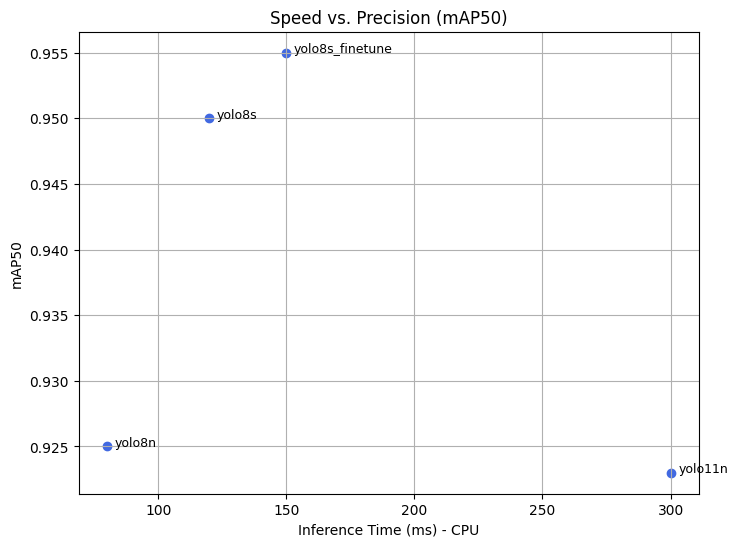

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("signature_models.csv")


x = df["inference_time_ms"]  
y = df["mAP50"]             
labels = df["Model"]        


plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="royalblue")


for i in range(len(df)):
    plt.text(x[i] + 3, y[i], labels[i], fontsize=9)


plt.xlabel("Inference Time (ms) - CPU")
plt.ylabel("mAP50")
plt.title("Speed vs. Precision (mAP50)")

plt.grid(True)
plt.show()
